##### <u>Математика в проге</u>

In [1]:
from myfunc import *

h, n = 0, 5
x, f = var('x'), sin(x)*ln(x)

my_print(f"Функция", bold=True)
display(f)
my_print(f"разложена в окрестности {h} рядом Тейлора степени {n}:", bold=True)
display(series(f, x, x0=h, n=n))

Функция


log(x)*sin(x)

разложена в окрестности 0 рядом Тейлора степени 5:


x*log(x) - x**3*log(x)/6 + O(x**5*log(x))

Применение разложения Тейлора при рассчёте синуса:


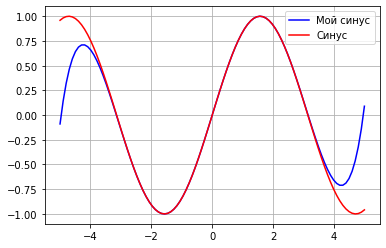

In [2]:
from myfunc import *

def my_sin(x):
    return sum([(1 - 2*bool((i-1)%4)) * x**i / math.factorial(i) for i in range(10) if i % 2 == 1])

my_print(f"Применение разложения Тейлора при рассчёте синуса:", bold=True)

x = np.linspace(-5, 5, 100)
y = [my_sin(i) for i in x]
plt.plot(x, y, c='b', label="Мой синус")
plt.plot(x, np.sin(x), c='r', label="Синус")
plt.legend()
plt.grid()
plt.show()

Функция


sin(x)

на интервале [1, 10] по теореме Римана об осцилляции имеет стремящийся к 0 интеграл следующего вида:


Integral(exp(I*x*λ)*sin(x), x)

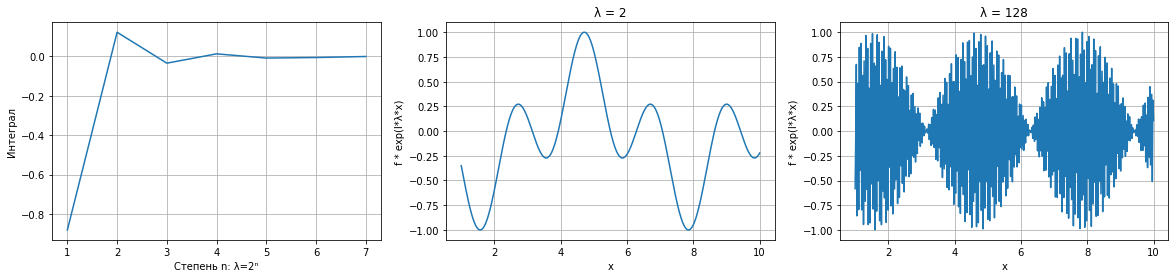

In [3]:
x, λ, f = var('x'), var('λ'), sin(x)
λ1, λ2, a, b = 1, 7, 1, 10

def riman_integral(l):
    return float(re( integrate(f * exp(I*l*x), (x, a, b))))

my_print(f"Функция", bold=True)
display(f)
my_print(f"на интервале [{a}, {b}] по теореме Римана об осцилляции имеет стремящийся к 0 интеграл следующего вида:", bold=True)
display(Integral(f * exp(I*λ*x), x))

fig, ax = plt.subplots(1, 3, figsize=(20, 4))
t = list(range(λ1, λ2+1))
y = [riman_integral(l=2**i) for i in t]
ax[0].plot(t, y)
ax[0].set_xlabel("Степень n: λ=2ⁿ")
ax[0].set_ylabel("Интеграл")
ax[0].grid()

x = np.linspace(a, b, 500)
for i in range(2):
    ax[i+1].plot(x, np.real(np.sin(x)*np.exp(1.j * 2**[λ1, λ2][i] * x)))
    ax[i+1].set_xlabel("x")
    ax[i+1].set_ylabel("f * exp(I*λ*x)")
    ax[i+1].set_title(f"λ = {2**[λ1, λ2][i]}")
    ax[i+1].grid()

plt.show()

##### <u>Графическое решение уравнения</u>

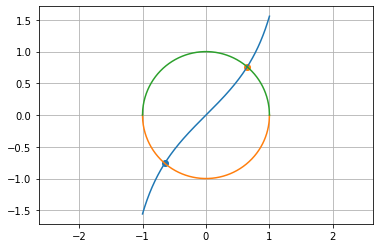

In [4]:
from myfunc import *

def simple_search(func1, func2, *arg):
    """Поиск решения func1=func2 умным подбором"""
    bot, top, tol, topside = arg
    while (bot - top > tol):
        mid = (top + bot) / 2
        cond = (func1(mid) - func2(mid, topside)) * (func1(top) - func2(top, topside)) > 0
        top, bot = (mid, bot) if cond else (top, mid)
    return (top + bot) / 2

def func_circle(x: float, topside: bool):
    anw = np.sqrt(abs(1 - x*x))
    return anw * (2 * int(topside) - 1)

# Гиперпараметры
delta, N = (1e-4, 500)

# Поиск решений
anw = [simple_search(np.tan, func_circle, 0.75, -0.75, delta, bool(i)) for i in range(2)]

# Отрисовка
x = np.linspace(-1, 1, N)
plt.plot(x, [np.tan(x[i]) for i in range(N)])
for j in range(2):
    plt.plot(x, [func_circle(x[i], int(j)) for i in range(N)])
    plt.scatter (anw[j], np.tan(anw[j]))
plt.grid()
plt.axis('equal')
plt.show()

##### <u>Экономика</u>

In [5]:
from myfunc import *

# Проценты в год
dy = 0.18  # 18%

# Денег на счёте
money = 380000  # рублей

# Месяцы
months = [1, 9, 12]

print(f"Прибыль в год: {round(100*dy, 5)}%")
dm = np.power(1 + dy, 1/12) - 1
print(f"Прибыль в месяц: {round(100*dm, 5)}%")
print(f"0 месяц: на вкладе {money} рублей ({round(money/1e3)} тысяч)")
for mm in months:
    money_ = money
    for i in range(mm):
        money_ *= (1 + dm)
    print(f"{mm} месяц: на вкладе {money_} рублей (+ {round((money_-money)/1e3)} тысяч) | Прибыль {round(100*money_/money - 100,2)}%")

Прибыль в год: 18.0%
Прибыль в месяц: 1.38884%
0 месяц: на вкладе 380000 рублей (380 тысяч)
1 месяц: на вкладе 385277.6035323958 рублей (+ 5 тысяч) | Прибыль 1.39%
9 месяц: на вкладе 430224.4639088511 рублей (+ 50 тысяч) | Прибыль 13.22%
12 месяц: на вкладе 448399.9999999993 рублей (+ 68 тысяч) | Прибыль 18.0%


##### <u>Неинтегрируемый интеграл</u>

In [6]:
from myfunc import *

xs, ys = sympy.var('x y')

eqs = sympy.Eq(ys, sympy.sin(1 / xs))
print(f"Функция:")
display(eqs)
print(f"Производная:")
display(eqs.rhs.diff(xs))
print(f"Интеграл от производной:")
display(sympy.integrate(eqs.rhs.diff(xs), xs))

eqs = sympy.Eq(ys, sympy.exp(1 / xs))
print(f"Функция:")
display(eqs)
print(f"Производная:")
display(eqs.rhs.diff(xs))

Функция:


Eq(y, sin(1/x))

Производная:


-cos(1/x)/x**2

Интеграл от производной:


sin(1/x)

Функция:


Eq(y, exp(1/x))

Производная:


-exp(1/x)/x**2

In [8]:
a, b = -1, -0.01
xn = np.linspace(a, b, 1000)

def func(x): return np.sin(1/x)
def d_func(t, y): return -np.cos(1/t)/t**2

In [9]:
a, b = 0.4, 1
xn = np.linspace(a, b, 10000)

def func(x): return np.exp(1/x)
def d_func(t, y): return -np.exp(1/t) * t**2

Функция:


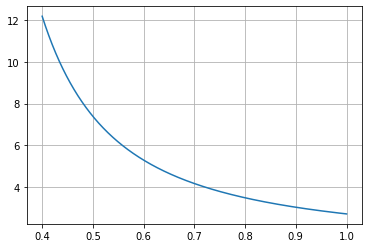

AttributeError: module 'scipy' has no attribute 'integrate'

In [11]:
print(f"Функция:")
plt.plot(xn, func(xn))
plt.grid()
plt.show()

print(f"Функция, восстановленная по производной:")
sol = scipy.integrate.solve_ivp(d_func, [a, b], [func(a)])
plt.plot(sol.t, sol.y[0])
plt.grid()
plt.show()

anw = scipy.integrate.ode(d_func)
anw.set_initial_value(func(a), a)
y2 = [func(a)]
for i in range(len(xn) - 1):
    y2.append(anw.integrate(xn[i+1])[0])
print(f"Функция, восстановленная по производной:")
plt.plot(xn, y2)
plt.grid()
plt.show()

y = [func(a)]
h = (a - b) / len(xn)
for i in xn[1:]:
    y.append(y[-1] + d_func(i, y[-1]) * i * h)
print(f"Функция, восстановленная вручную:")
plt.plot(xn, y)
plt.grid()
plt.show()

##### <u>Задачки</u>

Монетка бросается M раз. N - количество выпавших орлов. Найти вероятность такого события. $$P = \frac{C^{M}_{N}}{2^M}$$

Mонетка бросается 1 раз
Суммарная вероятность: 100.0%
Вероятность крайних элементов: 50.0%


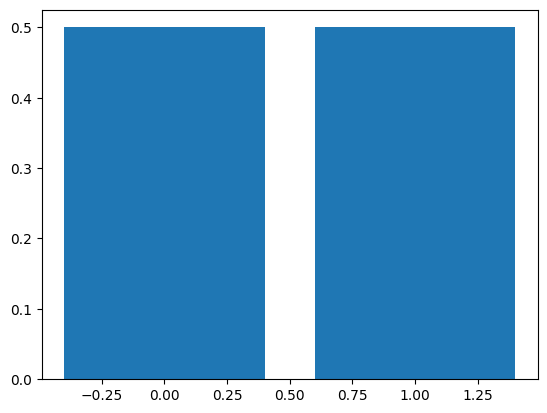

Mонетка бросается 10 раз
Суммарная вероятность: 100.0%
Вероятность крайних элементов: 0.09765625%


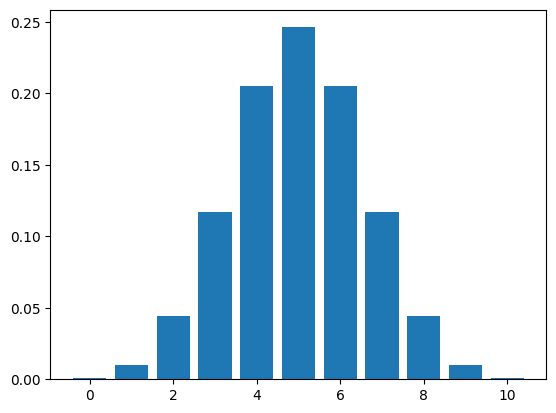

Mонетка бросается 100 раз
Суммарная вероятность: 100.00000000000003%
Вероятность крайних элементов: 7.888609052210118e-29%


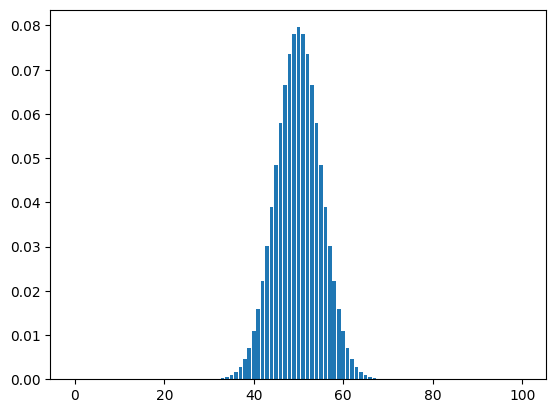

In [41]:
import matplotlib.pyplot as plt
import math

for M in [1, 10, 100]:
    N = list(range(M+1))
    P = [math.comb(M, i) / 2**M for i in N]
    print(f"\033[1mMонетка бросается {M} раз\033[0m")
    print(f"Суммарная вероятность: {sum(P)*100}%")
    print(f"Вероятность крайних элементов: {P[0]*100}%")
    
    plt.bar(N,P)
    plt.show()